In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
%config InlineBackend.figure_format="png"

/tungstenfs/nobackup/ggrossha/gypafoiv/miniconda3/envs/python_3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Global options

sns.set_style("white")
sns.set(font_scale=1, style="ticks")

height=15
aspect=1
x_jitter=0
y_jitter=0
alpha=1
marker='.'
s=1
legend=True
legend_out=False
linewidth=0
x_jitter=0
y_jitter=0
plt.rcParams["figure.figsize"] = (10,30)

In [3]:
def barplot_repeats(df, name):
    ax = sns.barplot(
        y="id", 
        x=f"logFC{name}", 
        data=df[~df["id"].str.startswith("WBGene")],
        color="gray"
    )
    plt.xticks(rotation=90)

# paths

In [4]:
repeats_ucsc_path = "../../00_annotation/results/annotation/ce_11_repeats.filtered.tsv"

In [5]:
dpf3_null_rep_name_path = "../../02_total_RNAseq_15_C/results/filter/DE_feature_counts_multimappers_repeat_name_level__WT__Dpf_3_null/DE_edgeR/final_table_FDR_low.tsv"

In [6]:
mut_2_rep_name_path = "../../02_total_RNAseq_15_C/results/filter/DE_feature_counts_multimappers_repeat_name_level__WT__mut_2/DE_edgeR/final_table_FDR_low.tsv"

In [7]:
mut_7_rep_name_path = "../../02_total_RNAseq_15_C/results/filter/DE_feature_counts_multimappers_repeat_name_level__WT__mut_7/DE_edgeR/final_table_FDR_low.tsv"

# annotation

In [8]:
repeats_ucsc = pd.read_csv(repeats_ucsc_path, header=0, sep="\t")

In [9]:
repeats_ucsc["repClass"].value_counts()

DNA          33579
Unknown       9070
Satellite     5444
RC            4551
DNA?           755
LTR            673
LINE           654
SINE           531
ARTEFACT         2
Name: repClass, dtype: int64

In [10]:
repeats_ucsc["repFamily"].value_counts()

DNA              16140
Unknown           9070
Satellite         5444
Helitron          4551
PiggyBac?         4316
hAT               3842
TcMar-Tc1?        2442
TcMar-Tc1         2115
TcMar-Pogo        1860
MULE-MuDR         1215
DNA?               755
CR1                478
Pao                465
tRNA-RTE           463
TcMar-Tc4          460
TcMar-Mariner      298
TcMar-Tc4?         206
TcMar-Tc2          201
Gypsy              170
CMC-Chapaev?       152
CMC-Chapaev        137
RTE                 98
CMC-Mirage          95
hAT?                71
R2?                 64
R2                  40
Jockey              38
LTR                 38
PIF-Harbinger       16
Merlin               9
tRNA-Deu-L2          4
MULE-MuDR?           4
ARTEFACT             2
Name: repFamily, dtype: int64

In [11]:
repeats_ucsc["repName"].value_counts()

MINISAT1_CE     3455
CELE2           3158
CERP3           2915
CELE14B         2451
LR9A            2150
                ... 
CER4-I_CE          3
TR5                3
CER17-LTR_CE       2
Turmoil2           2
IS10               2
Name: repName, Length: 181, dtype: int64

In [12]:
repeats_ucsc_short = repeats_ucsc[["repName", "repClass", "repFamily"]].drop_duplicates()

In [13]:
repeats_ucsc_short.head()

,repName,repClass,repFamily
0,CELE2,DNA,DNA
1,CELE1,DNA,TcMar-Tc1?
3,CELE14B,DNA,DNA
4,PALTTAA3_CE,DNA,PiggyBac?
5,CERP3,Unknown,Unknown


In [14]:
len(repeats_ucsc_short)

181

In [15]:
repeats_ucsc_short.columns = ["id", "class", "family"]

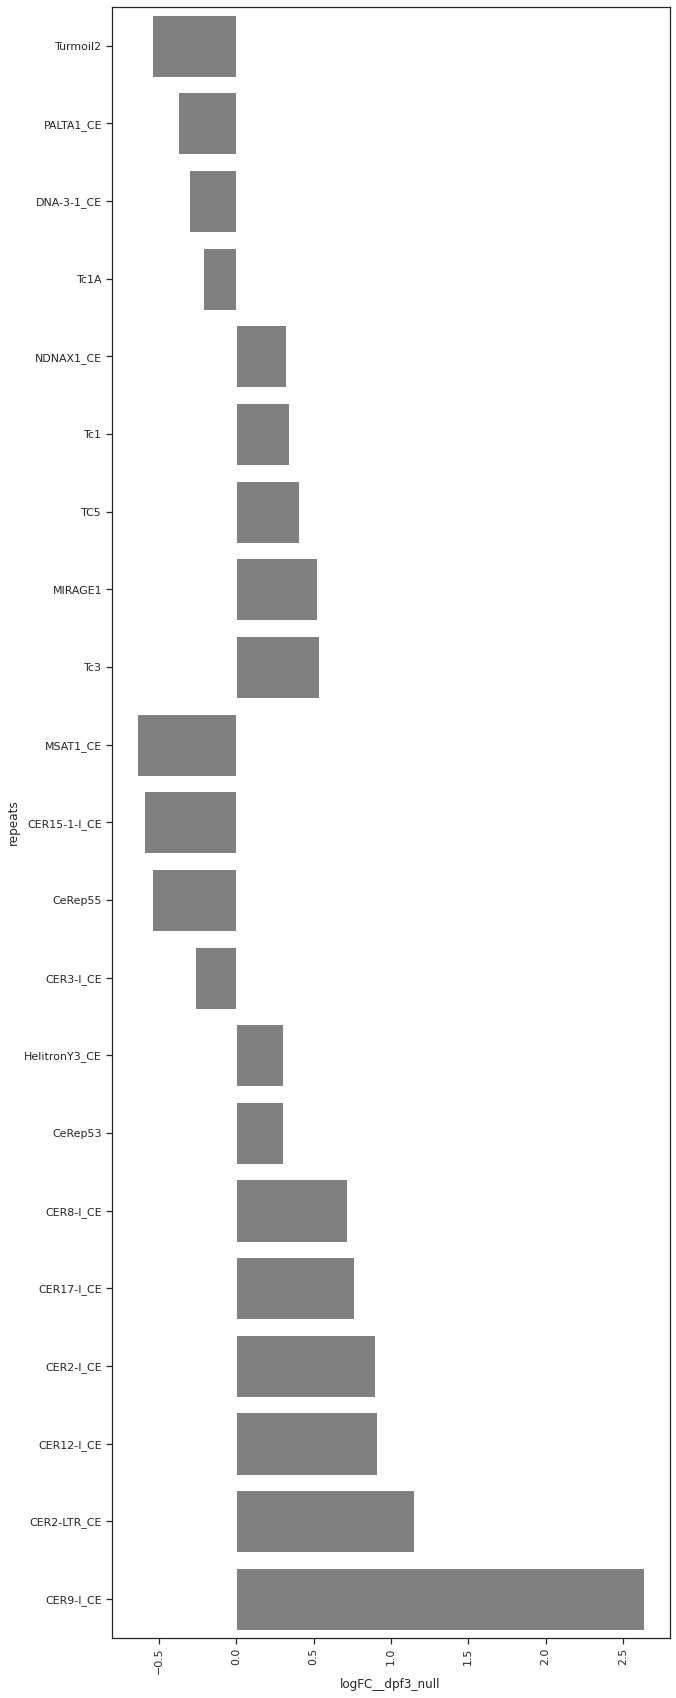

In [16]:
dpf3_null_rep_name = pd.read_csv(dpf3_null_rep_name_path, header=0, sep="\t")
dpf3_null_rep_name.set_index("id", inplace=True)
dpf3_null_rep_name.columns = dpf3_null_rep_name.columns + "__dpf3_null"
dpf3_null_rep_name.reset_index(inplace=True)
# barplot_repeats(dpf3_null_rep_name, "__dpf3_null")
dpf3_null_rep_name = dpf3_null_rep_name.merge(repeats_ucsc_short, on="id")
dpf3_null_rep_name_dna = dpf3_null_rep_name[dpf3_null_rep_name["class"].isin(["DNA", "DNA?"])].sort_values("logFC__dpf3_null")
dpf3_null_rep_name_not_dna = dpf3_null_rep_name[~dpf3_null_rep_name["class"].isin(["DNA", "DNA?"])].sort_values("logFC__dpf3_null")
dpf3_null_rep_name_concat = pd.concat([dpf3_null_rep_name_dna, dpf3_null_rep_name_not_dna], sort=False)
barplot_repeats(dpf3_null_rep_name_concat, "__dpf3_null", )
plt.ylabel("repeats")
plt.savefig("barplot_dpf-3_null_repeats_total_rna.pdf")

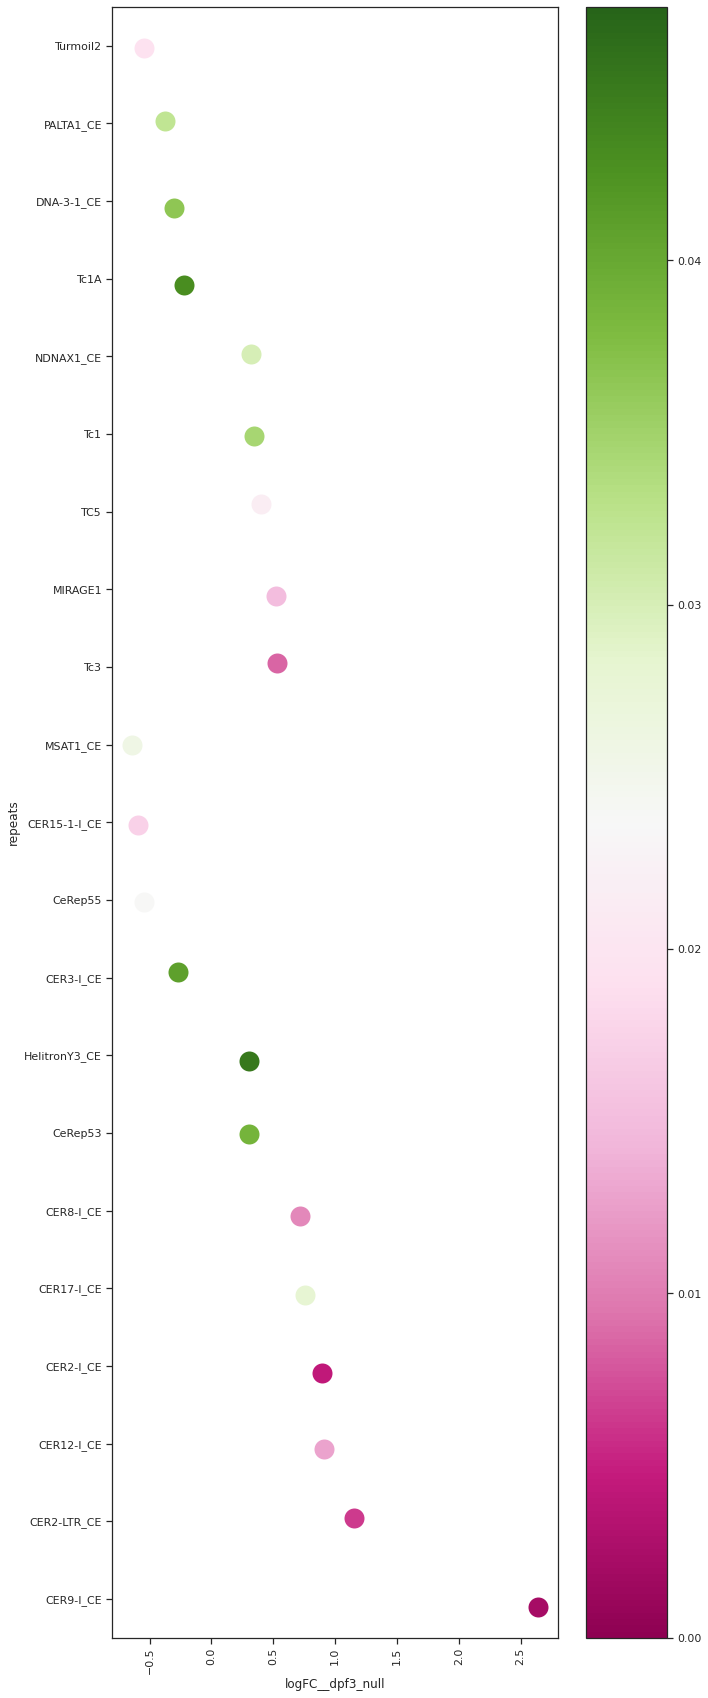

In [17]:
dpf3_null_rep_name_dna = dpf3_null_rep_name[dpf3_null_rep_name["class"].isin(["DNA", "DNA?"])].sort_values("logFC__dpf3_null")
dpf3_null_rep_name_not_dna = dpf3_null_rep_name[~dpf3_null_rep_name["class"].isin(["DNA", "DNA?"])].sort_values("logFC__dpf3_null")
dpf3_null_rep_name_concat = pd.concat([dpf3_null_rep_name_dna, dpf3_null_rep_name_not_dna], sort=False)
norm = plt.Normalize(dpf3_null_rep_name_concat["FDR__dpf3_null"].min(), dpf3_null_rep_name_concat["FDR__dpf3_null"].max())
sm = plt.cm.ScalarMappable(cmap="PiYG", norm=norm)
sm.set_array([])
ax = sns.stripplot(
    y="id", 
    x="logFC__dpf3_null", 
    data=dpf3_null_rep_name_concat[~dpf3_null_rep_name_concat["id"].str.startswith("WBGene")],
    hue="FDR__dpf3_null",
    palette='PiYG',
    size=20
)
ax.get_legend().remove()
ax.figure.colorbar(sm)

plt.xticks(rotation=90)
plt.ylabel("repeats")
plt.savefig("dotplot_dpf-3_null_repeats_total_rna.pdf")

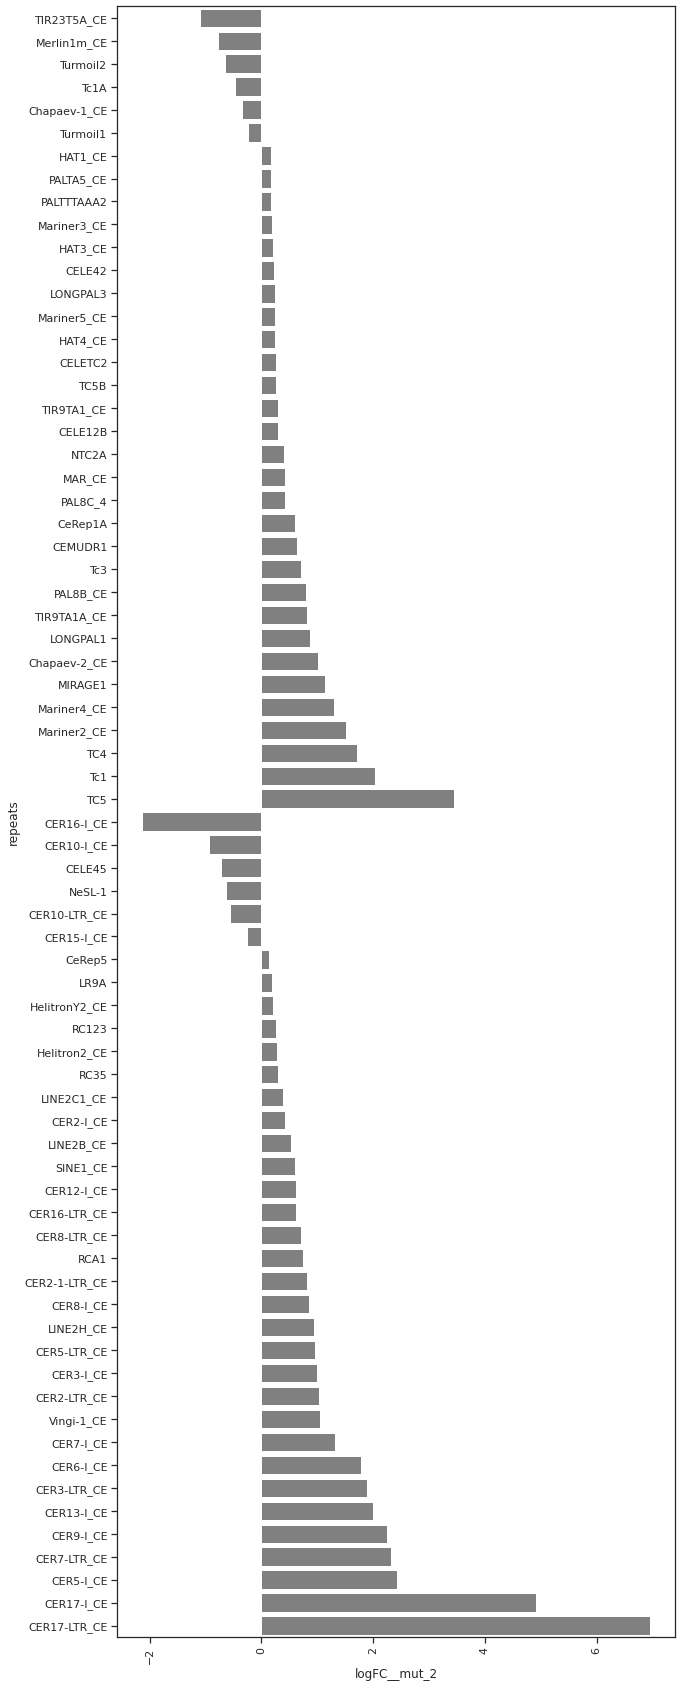

In [18]:
mut_2_rep_name = pd.read_csv(mut_2_rep_name_path, header=0, sep="\t")
mut_2_rep_name.set_index("id", inplace=True)
mut_2_rep_name.columns = mut_2_rep_name.columns + "__mut_2"
mut_2_rep_name.reset_index(inplace=True)
mut_2_rep_name = mut_2_rep_name.merge(repeats_ucsc_short, on="id")
mut_2_rep_name_dna = mut_2_rep_name[mut_2_rep_name["class"].isin(["DNA", "DNA?"])].sort_values("logFC__mut_2")
mut_2_rep_name_not_dna = mut_2_rep_name[~mut_2_rep_name["class"].isin(["DNA", "DNA?"])].sort_values("logFC__mut_2")
mut_2_rep_name_concat = pd.concat([mut_2_rep_name_dna, mut_2_rep_name_not_dna], sort=False)
barplot_repeats(mut_2_rep_name_concat, "__mut_2")
plt.ylabel("repeats")
plt.savefig("barplot_mut-2_repeats_total_rna.pdf")

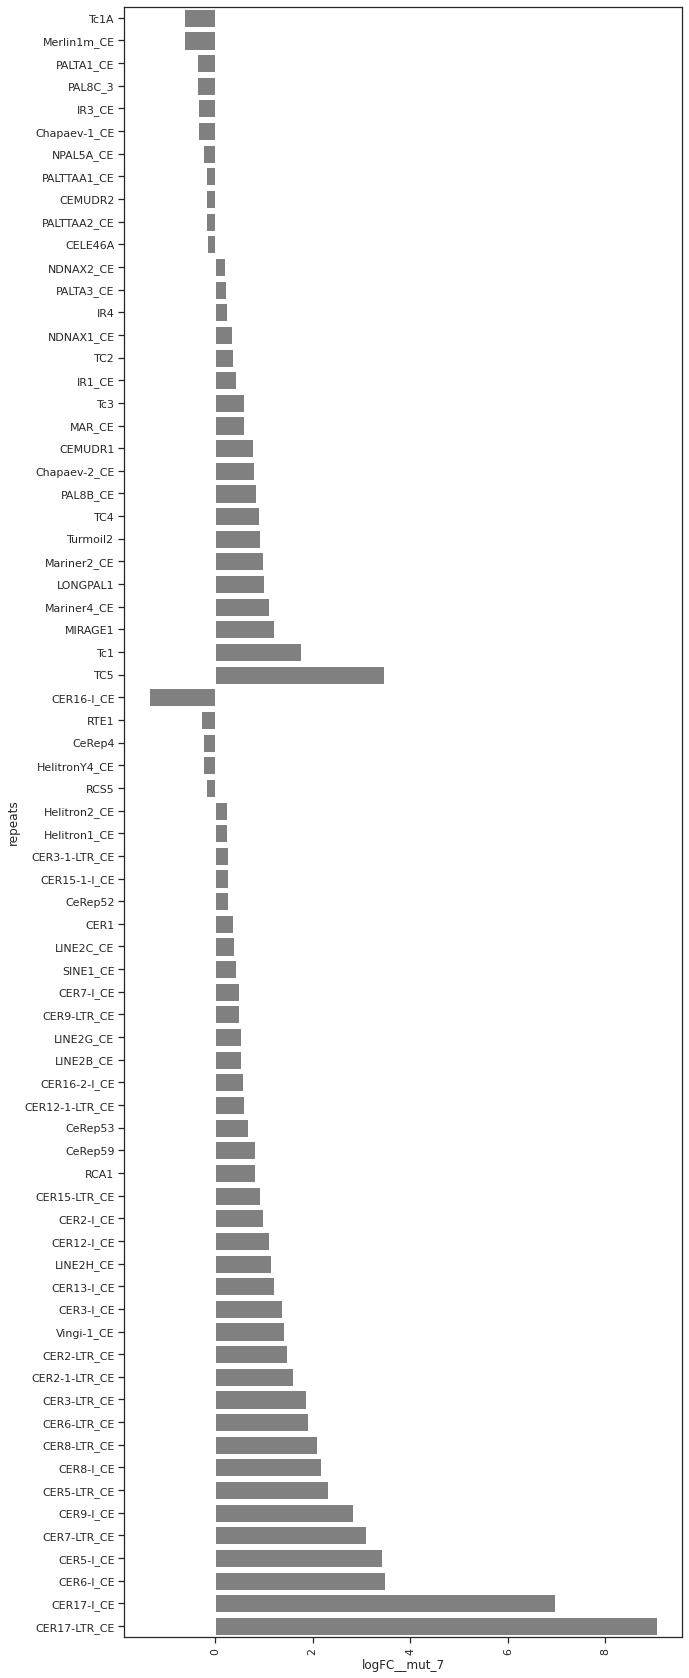

In [19]:
mut_7_rep_name = pd.read_csv(mut_7_rep_name_path, header=0, sep="\t")
mut_7_rep_name.set_index("id", inplace=True)
mut_7_rep_name.columns = mut_7_rep_name.columns + "__mut_7"
mut_7_rep_name.reset_index(inplace=True)
mut_7_rep_name = mut_7_rep_name.merge(repeats_ucsc_short, on="id")
mut_7_rep_name_dna = mut_7_rep_name[mut_7_rep_name["class"].isin(["DNA", "DNA?"])].sort_values("logFC__mut_7")
mut_7_rep_name_not_dna = mut_7_rep_name[~mut_7_rep_name["class"].isin(["DNA", "DNA?"])].sort_values("logFC__mut_7")
mut_7_rep_name_concat = pd.concat([mut_7_rep_name_dna, mut_7_rep_name_not_dna], sort=False)
barplot_repeats(mut_7_rep_name_concat, "__mut_7")
plt.ylabel("repeats")
plt.savefig("barplot_mut-7_repeats_total_rna.pdf")

# make panel

In [20]:
dpf3_null_rep_name = pd.read_csv(dpf3_null_rep_name_path, header=0, sep="\t")
dpf3_null_rep_name.set_index("id", inplace=True)
dpf3_null_rep_name.columns = dpf3_null_rep_name.columns + "__dpf3_null"
dpf3_null_rep_name.reset_index(inplace=True)

In [21]:
mut_2_rep_name = pd.read_csv(mut_2_rep_name_path, header=0, sep="\t")
mut_2_rep_name.set_index("id", inplace=True)
mut_2_rep_name.columns = mut_2_rep_name.columns + "__mut_2"
mut_2_rep_name.reset_index(inplace=True)

In [22]:
mut_7_rep_name = pd.read_csv(mut_7_rep_name_path, header=0, sep="\t")
mut_7_rep_name.set_index("id", inplace=True)
mut_7_rep_name.columns = mut_7_rep_name.columns + "__mut_7"
mut_7_rep_name.reset_index(inplace=True)

# merge single dataframes

In [23]:
dfs = [dpf3_null_rep_name, mut_2_rep_name, mut_7_rep_name]
df_final = reduce(lambda left,right: pd.merge(left,right,on='id', how="outer"), dfs)

In [24]:
df_final_short = df_final[['id', "logFC__dpf3_null", "logFC__mut_2", "logFC__mut_7"]].copy()

In [25]:
df_final_short.head()

,id,logFC__dpf3_null,logFC__mut_2,logFC__mut_7
0,CER12-I_CE,0.909009,0.614003,1.110407
1,CER15-1-I_CE,-0.596994,NaN,0.268109
2,CER17-I_CE,0.760630,4.923883,6.968661
3,CER2-I_CE,0.897723,0.429358,0.992340
4,CER2-LTR_CE,1.150125,1.023898,1.479927


In [26]:
df_final_short.fillna(0, inplace=True)

In [27]:
df_final_short.head()

,id,logFC__dpf3_null,logFC__mut_2,logFC__mut_7
0,CER12-I_CE,0.909009,0.614003,1.110407
1,CER15-1-I_CE,-0.596994,0.000000,0.268109
2,CER17-I_CE,0.760630,4.923883,6.968661
3,CER2-I_CE,0.897723,0.429358,0.992340
4,CER2-LTR_CE,1.150125,1.023898,1.479927


# merge repeat annotation and single dataframes

In [28]:
df_final_short_with_annotation = df_final_short.merge(repeats_ucsc_short)
df_final_short_with_annotation.set_index("id", inplace=True)

In [29]:
df_final_short_with_annotation.head()

,logFC__dpf3_null,logFC__mut_2,logFC__mut_7,class,family
id,,,,,
CER12-I_CE,0.909009,0.614003,1.110407,LTR,Pao
CER15-1-I_CE,-0.596994,0.000000,0.268109,LTR,Pao
CER17-I_CE,0.760630,4.923883,6.968661,LTR,Pao
CER2-I_CE,0.897723,0.429358,0.992340,LTR,Gypsy
CER2-LTR_CE,1.150125,1.023898,1.479927,LTR,Gypsy


In [30]:
df_final_short_with_annotation_dna_first = pd.concat(
    [
        df_final_short_with_annotation[df_final_short_with_annotation["class"].isin(["DNA", "DNA?"])],
        df_final_short_with_annotation[~df_final_short_with_annotation["class"].isin(["DNA", "DNA?"])]
    ]
)

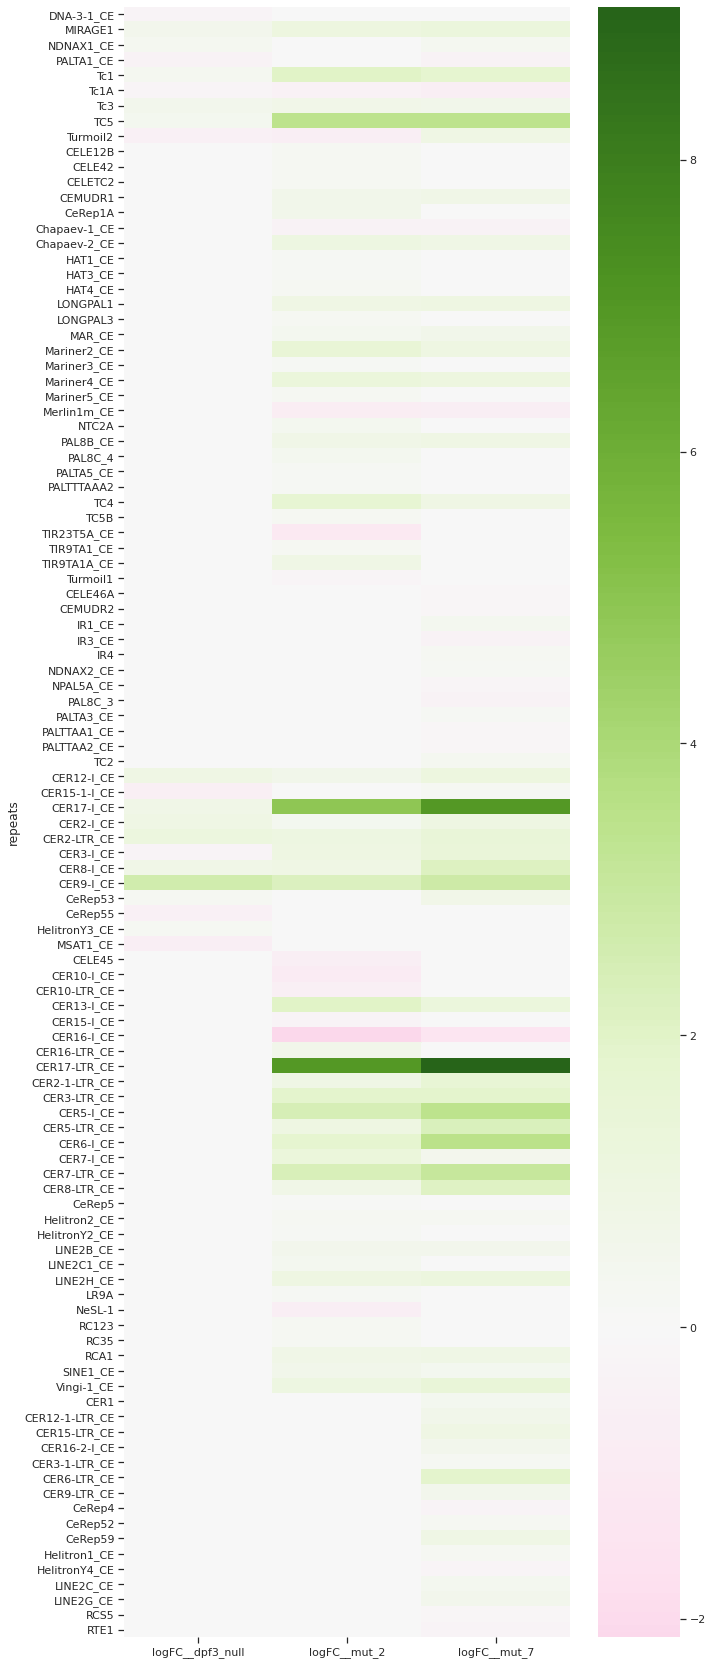

In [31]:
sns.heatmap(df_final_short_with_annotation_dna_first[["logFC__dpf3_null", "logFC__mut_2", "logFC__mut_7"]], cmap="PiYG", center=0)
plt.ylabel("repeats")
plt.savefig("heatmap_repeats_total_rna.pdf")

In [32]:
repeats_ucsc_short

,id,class,family
0,CELE2,DNA,DNA
1,CELE1,DNA,TcMar-Tc1?
3,CELE14B,DNA,DNA
4,PALTTAA3_CE,DNA,PiggyBac?
5,CERP3,Unknown,Unknown
...,...,...,...
25102,IS10,ARTEFACT,ARTEFACT
25429,CeRep57,Satellite,Satellite
29876,CER17-LTR_CE,LTR,Pao
31183,CeRep53,Satellite,Satellite


In [33]:
df_final_short_with_annotation_dna_first.to_csv("heatmap_list.tsv", header=True, index=True, sep="\t")